# Group Project - Lyrics analysis

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lyrics = pd.read_csv("newContestants.csv")
lyrics = lyrics[["performer", "song", "lyrics"]]
lyrics

performer                 song  \
0                      Johnny Logan  What's Another Year   
1                     Katja Ebstein              Theater   
2                       Prima Donna  Love Enough For Two   
3                             Paola               Cinéma   
4                    Maggie MacNeal            Amsterdam   
...                             ...                  ...   
1175                          Srbuk          Walking Out   
1176                          D mol               Heaven   
1177  Darude feat. Sebastian Rejman            Look Away   
1178                          Pænda               Limits   
1179                 Sarah McTernan                   22   

                                                 lyrics  
0     I've been waitin' such a long time\nLookin' ou...  
1     Sie setzen jeden Abend eine Maske auf\nUnd sie...  
2     If there's a place in your heart for me\nThere...  
3     Toute petite, quelquefois il me prenait par la...  
4     Waar in de wereld je ook bent\nJe denkt terug ...  
...                                                 ...  
1175  Who are you?\nWhat you really do?\nWhen you ha...  
1176  Life, life was once so lonely\nHeartbreak was ...  
1177  There's something you should know\nThat I can'...  
1178  Mind's got to move, but I'm so trapped within ...  
1179  I see 22, oh, and I think of you\nLately that'...  

[1180 rows x 3 columns]

## Data Analysis

1. Tokenizing the lyrics of the songs

In [3]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize
tokenized_lyrics = []
for index, row in lyrics.iterrows():
    lyrics_rows_removed = row['lyrics'].split("\\n")
    lyrics_space_separated = []
    for sep_row in lyrics_rows_removed:
        lyrics_space_separated.append(sep_row.split(" "))
    words_without_chars = []
    chars =",'.?-?!())-–"
    for line in lyrics_space_separated:
        for word in line:
            word = word.strip(chars)
            if (word != 'I' and not word.startswith("I'")):
                word = word.lower()
            if (word != ''):
                words_without_chars.append(word)
    tokenized_lyrics.append(words_without_chars)
tokenized_lyrics

[["I've",
  'been',
  'waitin',
  'such',
  'a',
  'long',
  'time',
  'lookin',
  'out',
  'for',
  'you',
  'but',
  "you're",
  'not',
  'here',
  "what's",
  'another',
  'year',
  "I've",
  'been',
  'wakin',
  'such',
  'a',
  'long',
  'time',
  'reachin',
  'out',
  'for',
  'you',
  'but',
  'you',
  "aren't",
  'near',
  "what's",
  'another',
  'year',
  "what's",
  'another',
  'year',
  'for',
  'someone',
  "who's",
  'lost',
  'everything',
  'that',
  'he',
  'owns',
  "what's",
  'another',
  'year',
  'for',
  'someone',
  "who's",
  'gettin',
  'used',
  'to',
  'bein',
  'alone',
  "I've",
  'been',
  'prayin',
  'such',
  'a',
  'long',
  'time',
  "it's",
  'the',
  'only',
  'way',
  'to',
  'hide',
  'the',
  'fear',
  "what's",
  'another',
  'year',
  "what's",
  'another',
  'year',
  'for',
  'someone',
  "who's",
  'lost',
  'everything',
  'that',
  'he',
  'owns',
  "what's",
  'another',
  'year',
  'for',
  'someone',
  "who's",
  'gettin',
  'used',
  

2. Finding most frequently used words, excluding uninteresting words (conjunctions etc)

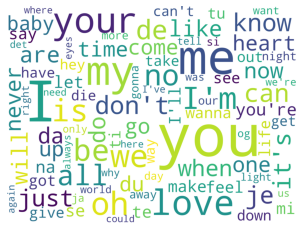

In [4]:
# code partially sourced from: https://stackoverflow.com/questions/21646791/convert-python-list-to-pandas-series
from wordcloud import WordCloud
tokenized_lyrics_to_one_array = []
uninteresting_words = ["the","a", "and", "but", "to", "that", "this", "so", "for", "of", "it", "on", "in", "la", "lo", "en", "at", "from", "what", "not", "el", "le", "i", "o", "que", "un", "ne", "with", "et", "yeah", "if", "how", "cause", "there", "y", "und", "e", ]
for song in tokenized_lyrics:
    for word in song:
        if (word not in uninteresting_words):
            tokenized_lyrics_to_one_array.append(word)
mySeries = pd.Series(tokenized_lyrics_to_one_array) 
data = mySeries.value_counts().to_dict()
wc = WordCloud(width=4000, height=3000, min_font_size = 80, max_font_size = 800, background_color = "white", max_words = 90).generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

3. Finding which word sequences appear most frequently, using n-grams

3.1 Trigrams

Text(0.5, 1.0, 'Top 15 Trigrams')

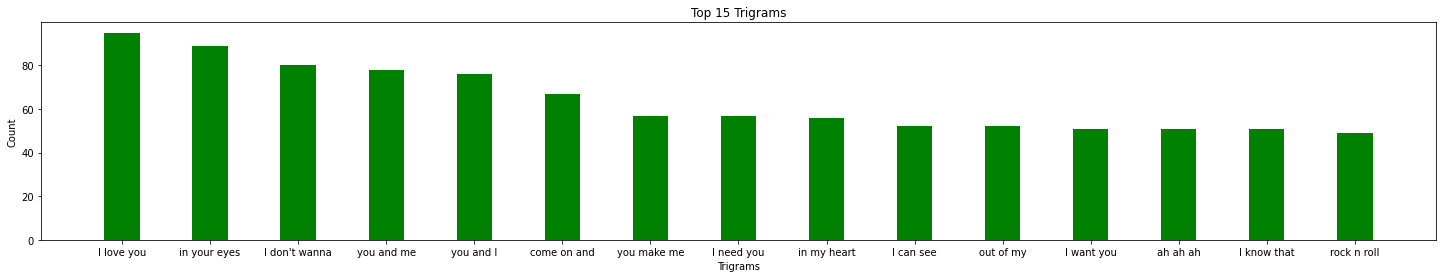

In [5]:
# code partially sourced from https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
from collections import defaultdict

def generate_N_grams(text,ngram=1):
  words = [word for word in text.split(" ") if word not in set(['oh', 'la', 'laj', 'hey', 'yeah', 'na', 'no', 'the'])]#set(stopwords.words('english') + ['hey', 'oh', 'la', 'na', 'laj', 'uo', 'yeah', 'I'])]  
  #print("Sentence after removing stopwords:",words)
  temp = zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

trigrams=defaultdict(int)
for song in tokenized_lyrics:
    lyrics_as_string = ' '.join(song)
    for trigram in generate_N_grams(lyrics_as_string, 3):
        trigrams[trigram] += 1
#get the count of every word in both the columns of df_train and df_test dataframes

df_trigrams=pd.DataFrame(sorted(trigrams.items(),key=lambda x:x[1],reverse=True))

most_freq_trig1=df_trigrams[0][:15]
most_freq_trig2=df_trigrams[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_trig1,most_freq_trig2, color ='green',
        width = 0.4)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 15 Trigrams")

3.2 Bigrams

Text(0.5, 1.0, 'Top 15 Bigrams')

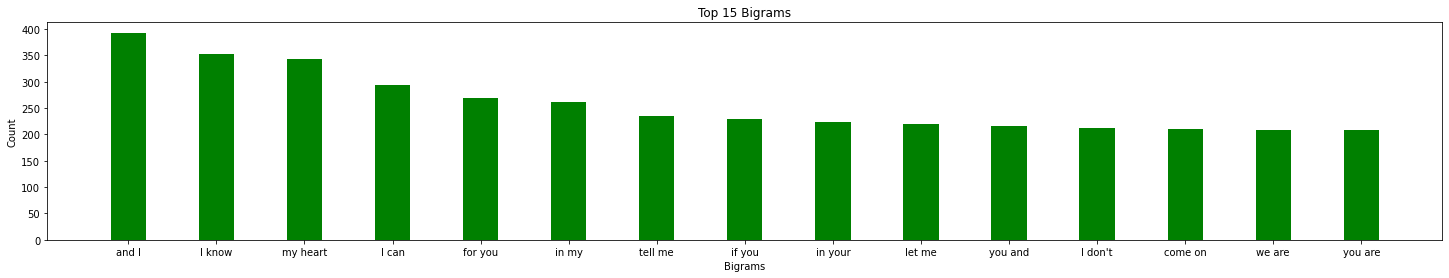

In [6]:
# code partially sourced from https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
bigrams=defaultdict(int)
for song in tokenized_lyrics:
    lyrics_as_string = ' '.join(song)
    for bigram in generate_N_grams(lyrics_as_string, 2):
        bigrams[bigram] += 1
#get the count of every word in both the columns of df_train and df_test dataframes

df_bigrams=pd.DataFrame(sorted(bigrams.items(),key=lambda x:x[1],reverse=True))

most_freq_big1=df_bigrams[0][:15]
most_freq_big2=df_bigrams[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_big1,most_freq_big2, color ='green',
        width = 0.4)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 15 Bigrams")

3.3 Skip-grams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Top 15 Skipgrams of length 3')

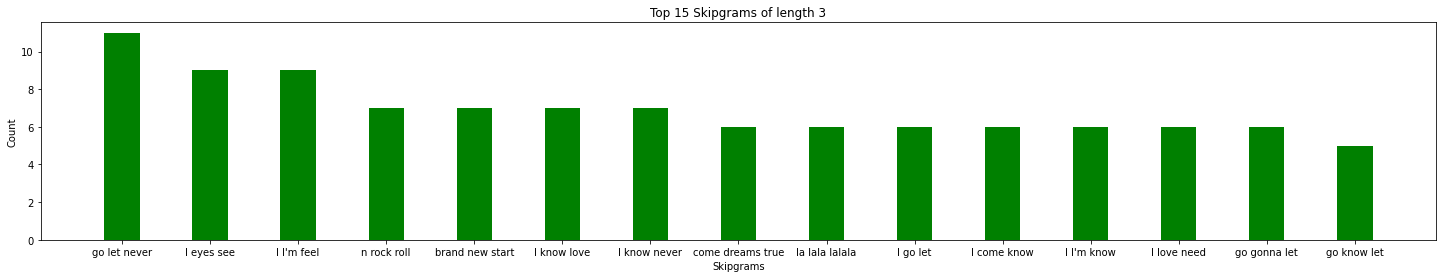

In [30]:
import nltk
from nltk.util import skipgrams
from nltk.corpus import stopwords
nltk.download('stopwords')

def all_different_words(words):
    for i in range(len(words)):
        for j in range(len(words)):
            if (i!=j and words[i] == words[j]):
                return False
    return True    

skipgrams_dict = defaultdict(int)

#TODO - tee igast skipgramist sorteeritud list. Lisaks sõnastik, kus hoitakse listile vastavuses normaalses järjestuses sõnet (kui list on juba sõnastikus, siis sõnede sõnastikus kirjet ei asendata (et graafikul oleks loogilised fraasid)) (Kas see on vajalik/mõttekas?)

for song in tokenized_lyrics:
    song_meaningful = [i for n, i in enumerate(song) if (i not in song[:n] and i not in set(stopwords.words('english'))) ]#[lyric for lyric in song if (len(lyric) > 3 )]#and lyric not in set(stopwords.words('english')))]
    for gram in list(skipgrams(song_meaningful, 3, 2)):
        if (all_different_words(gram)):
            gram_sorted = sorted(gram)
            gram_as_string = ' '.join(gram_sorted)
            skipgrams_dict[gram_as_string] += 1

skipgrams_most_freq = pd.DataFrame(sorted(skipgrams_dict.items(),key=lambda x:x[1],reverse=True))

most_freq_sg1=skipgrams_most_freq[0][:15]
most_freq_sg2=skipgrams_most_freq[1][:15]

plt.figure(1,figsize=(25,4))
plt.bar(most_freq_sg1,most_freq_sg2, color ='green',
        width = 0.4)
plt.xlabel("Skipgrams")
plt.ylabel("Count")
plt.title("Top 15 Skipgrams of length 3")